# WIDANAGAMAGE T.R
# 190691B

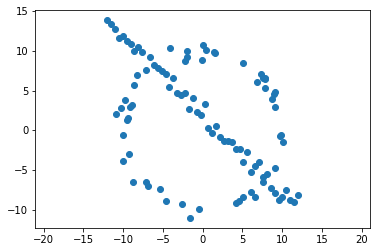

In [92]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from scipy.stats import circstd
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import sympy

np.random.seed(45)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)

n = s*np.random.randn(half_n)
t_ = 1.96*1

x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n ,1)))
X = np.vstack((X_circ, X_line))

plt.scatter(X[..., 0], X[..., 1] )
plt.axis('equal')

# plt.scatter(X_line, X)

# print(X_circ)
# print(X_line)
# print(X)
plt.show()

26.83127200188791
kk 62
62
rad 10.016604503933335


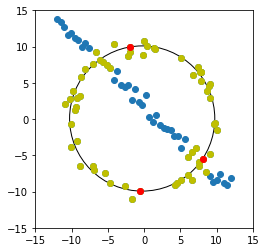

In [93]:
def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return ((cx, cy), radius)

p = 0.999 
e = 39/100 #outlier ration
s = 3  #typical minimum number needed to fit the model
N = np.log10(1-p)/np.log10(1-(1-e)**s)
print(N)
max_k = 0

for i in range(int(N)+1):
    ind1 = np.random.randint(0, 2*half_n)
    ind2 = np.random.randint(0, 2*half_n)
    ind3 = np.random.randint(0, 2*half_n)
    c1 = [X[..., 0][ind1], X[..., 1][ind1]]
    c2 = [X[..., 0][ind2], X[..., 1][ind2]]
    c3 = [X[..., 0][ind3], X[..., 1][ind3]]
    # print(c1, c2, c3)
    
    cen, rad = define_circle(c1, c2, c3)
    k = 0
    inliers = []

    for i in range(2*half_n):
        a, b = X[..., 0][i], X[..., 1][i]
        if cen is None: continue
        dis2 = np.sqrt((a-cen[0])**2 + (b - cen[1])**2)
        r = rad     
        # print(dis2, r)
        if r-t_ < dis2 < r + t_:
            k+=1
            inliers.append([a, b])
    # print(k)
    # break
    if max_k < k and rad < 12:
        max_k = k
        f_c1, f_c2, f_c3 = c1, c2, c3
        f_cen, f_rad = cen, rad
        f_inlier = inliers
    if k > 61:  #*(1-e)
        print("kk", k)
        break
    # break

f_inlier = np.array(f_inlier)
# print(f_inlier)
print(max_k)
circle=plt.Circle(f_cen,f_rad, fill = False)
print("rad", f_rad)
fig, ax = plt.subplots()
ax.add_patch(circle)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])
ax.set_aspect('equal')
plt.scatter(X[..., 0], X[..., 1])
plt.scatter(f_inlier[..., 0], f_inlier[..., 1], color='y')
plt.scatter(np.array((f_c1, f_c2, f_c3))[..., 0], np.array((f_c1, f_c2, f_c3))[..., 1], color = 'r')

plt.show()

In [96]:
def dist(x1, y1, a, b, c):    
    d = abs((a * x1 + b * y1 + c)) / ((a * a + b * b)**0.5)
    return d

def drawcircle(x1, y1, x2, y2, x3, y3) :
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    return (px, py), r


def ransacLine(x,y,N):
    Td =  1
    TiC = (N//2)*0.95
    print(TiC)

    iter = 10000
    max_in = 0
    model = (0,0)


    for i in range (iter):
        p = np.random.randint(0,len(y)) 
        q = np.random.randint(0,len(y))
        x1,x2,y1,y2 = x[p],x[q],y[p],y[q]
        if (x1!=x2):
            m1 = (y2 - y1) / (x2 - x1)
            c1 = y1 - m1 * x1 
            
        
            inl_cnt = 0
            for j in range(len(y)):
                a = dist(x[j],y[j],m1,-1,c1)
                if (a<=Td):
                    inl_cnt+=1
            # print(inl_cnt)
            if (inl_cnt>max_in and inl_cnt>TiC):
                max_in = inl_cnt
                model = (m1,c1)

    return model[0],model[1]
def ransacCircle(x,y,N):
    Td =  1
    TiC = 45 #(N//2)*0.95
    iter = 100
    short_list = []
    for i in range (iter):
        p = np.random.randint(0,len(y)) 
        q = np.random.randint(0,len(y))
        r = np.random.randint(0,len(y))
        x1,x2,x3,y1,y2,y3 = x[p],x[q],x[r],y[p],y[q],y[r]
        if (x1 != x2 and x2 != x3 and x1 != x3):
                cen,rad = drawcircle(x1, y1, x2, y2, x3, y3)
                if (rad<10):
                    inl_cnt = 0
                    inl_x = []
                    inl_y = []
                    for j in range(len(y)):
                        dist = ((x[j] - cen[0])**2 + (y[j] - cen[1])**2)**0.5
                        if (abs(dist-rad)<Td):
                                inl_cnt+=1
                                inl_x.append(x[j])
                                inl_y.append(y[j])
                    if (inl_cnt>TiC):
                        for i in range (iter):
                            p = np.random.randint(0,len(inl_y)) 
                            q = np.random.randint(0,len(inl_y))
                            r = np.random.randint(0,len(inl_y))
                            x11,x22,x33,y11,y22,y33 = inl_x[p],inl_x[q],inl_x[r],inl_y[p],inl_y[q],inl_y[r]
                            if (x11 != x22 and x22 != x33 and x11 != x33):
                                    cen1,rad1 = drawcircle(x11, y11, x22, y22, x33, y33)
                                    inl_x1 = []
                                    inl_y1 = []
                                    inl_cnt1 = 0
                                    error = 0
                                    for j in range(len(inl_y)):
                                        dist = ((inl_x[j] - cen1[0])**2 + (inl_y[j] - cen1[1])**2)**0.5
                                        if (abs(dist-rad1)<Td):
                                                error += abs(dist - rad1)
                                                inl_cnt1+=1
                                                inl_x1.append(inl_x[j])
                                                inl_y1.append(inl_y[j])
                                    if (inl_cnt>TiC):
                                        short_list.append([cen,rad,cen1,rad1,inl_cnt1,error/inl_cnt1,inl_x,inl_y,[x1,x2,x3],[y1,y2,y3]])
           
    short_list.sort(key=lambda x: (x[4],-x[5]))
    return short_list[-1]

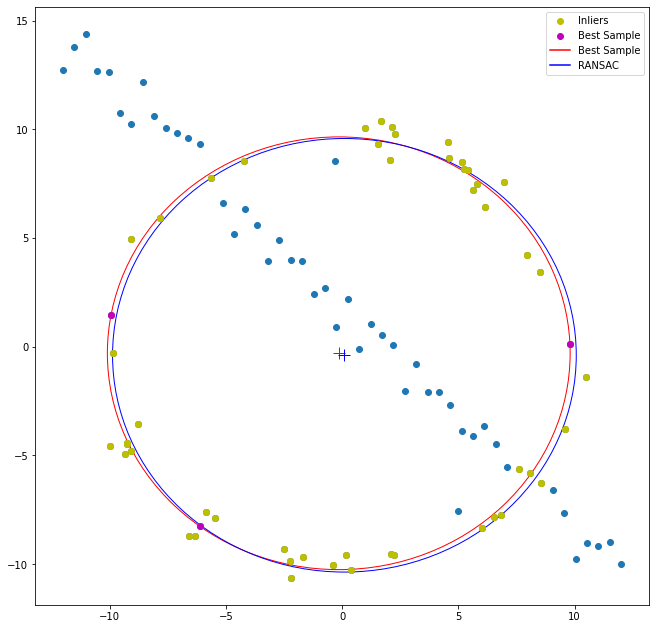

In [97]:
X_data, Y_data = [],[]
N = 100
half_n = N // 2
r = 10
s = r/16
t = np.random.uniform(0 , 2*np.pi , half_n )
n = s*np.random.randn(half_n)
x , y = (r+n)*np.cos(t),(r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1 ) , y.reshape( half_n , 1 ) ) )
m, b = -1, 2
x = np.linspace(-12, 12 , half_n )
y = m*x + b + s*np.random.randn( half_n )
X_line = np.hstack((x.reshape( half_n , 1 ) , y.reshape( half_n , 1 ) ) )
X = np.vstack(( X_circ , X_line ) )

for vals in X:
    X_data.append(vals[0])
    Y_data.append(vals[1])


figure, axes = plt.subplots(figsize = (11,11))
plt.scatter(X_data,Y_data)
z = ransacCircle(X_data,Y_data,N)

aa = plt.Circle(z[0],z[1],fill=False,color='r')
axes.add_artist(aa)

plt.plot(z[0][0],z[0][1], 'r', marker='+', markersize=12)

bb = plt.Circle(z[2],z[3],fill=False,color='b')
axes.add_artist(bb)

plt.scatter(z[6],z[7],color = 'y',label = 'Inliers')
plt.scatter(z[8],z[9],color = 'm',label='Best Sample')

plt.plot(z[2][0],z[2][1], 'b', marker='+', markersize=12)

handles, labels = axes.get_legend_handles_labels()
legend =  [Line2D([0], [0], color='r', label='Best Sample',
                          markerfacecolor='g', markersize=10), Line2D([0], [0], color='b', label='RANSAC',
                          markerfacecolor='b', markersize=10)]
handles.append(legend[0])
handles.append(legend[1])

plt.legend(handles=handles)

plt.show()


In [3]:
import cv2 as cv
# Create point matrix get coordinates of mouse click on image
point_matrix = np.zeros((2,2),np.int)
counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    # Left button click
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

C:\Users\traja\AppData\Local\Temp\ipykernel_10036\1362476941.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  point_matrix = np.zeros((2,2),np.int)


[[134, 318]]
[[134, 318], [519, 377]]
[[134, 318], [519, 377], [515, 513]]
[[134, 318], [519, 377], [515, 513], [129, 518]]
[[ 3.21060677e-01 -4.90105000e-03  1.34000000e+02]
 [ 1.20634418e-01  2.09567231e-01  3.18000000e+02]
 [ 2.40138932e-04  2.38204131e-06  1.00000000e+00]]


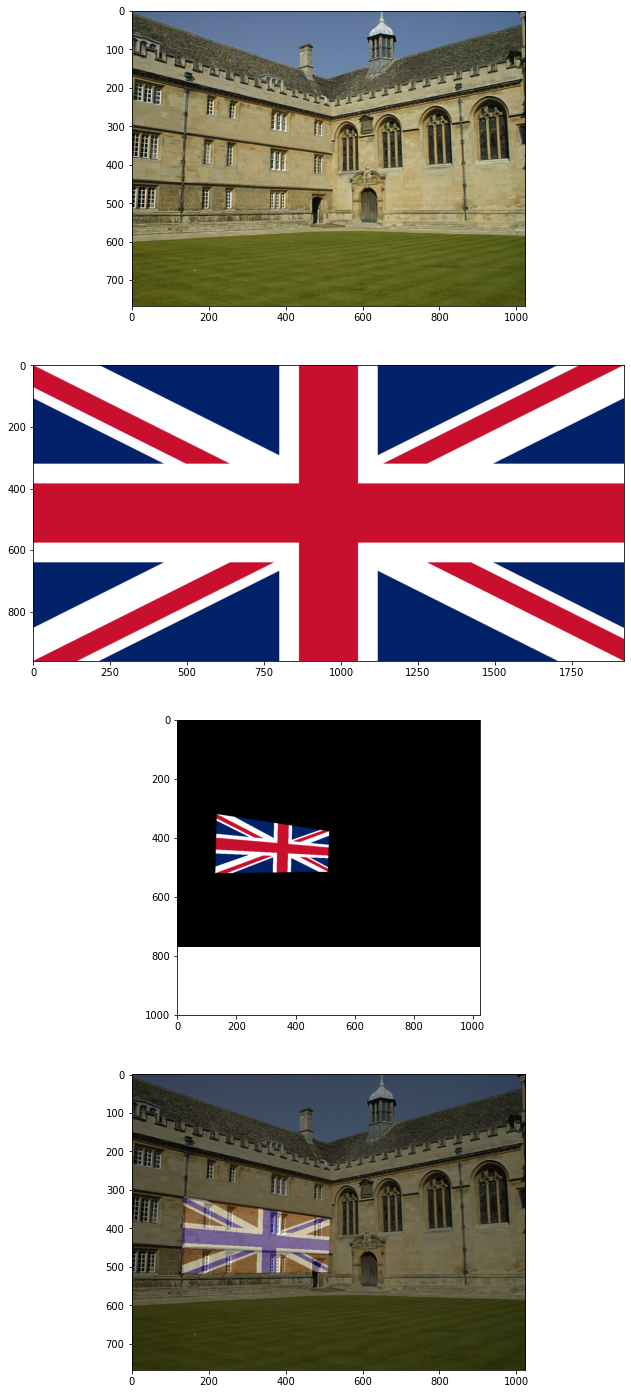

In [21]:
import cv2 as cv

dst_cordinate = [] 
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
    # checking for left mouse clicks
    if event == cv.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell 
        dst_cordinate.append([x,y])
        print(dst_cordinate)
        if len(dst_cordinate) == 4: cv.destroyAllWindows()
 

img = cv.imread('image/001.jpg', 1)
assert img is not None
 

cv.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
cv.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
cv.waitKey(0)
 
    # close the window
cv.destroyAllWindows()


src_cordinate = [[0, 0], [1960, 0], [1960, 960], [0, 960]]
H, status = cv.findHomography(np.array(src_cordinate), np.array(dst_cordinate))
print(H)
im4 = cv.imread('image/Flag_of_the_United_Kingdom.svg.png')
assert im4 is not None

im1to4 = cv.warpPerspective(im4, H, (np.shape(img)[1], np.shape(img)[0]))

im1= cv.cvtColor(img, cv.COLOR_BGR2RGB)
im4= cv.cvtColor(im4, cv.COLOR_BGR2RGB)
im1to4= cv.cvtColor(im1to4, cv.COLOR_BGR2RGB)

dst = cv.addWeighted(img, 0.6, im1to4, 0.4, 0.0)
dst = cv.cvtColor(dst, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(4, 1, figsize=(25, 25))

ax[0].imshow(im1)
ax[1].imshow(im4)
ax[2].imshow(im1to4)
ax[2].set_ylim([1000, 0])
ax[2].set_aspect('equal')
ax[3].imshow(dst)
plt.show()


cv.imshow('dst', dst)
cv.waitKey(0)
cv.destroyAllWindows()

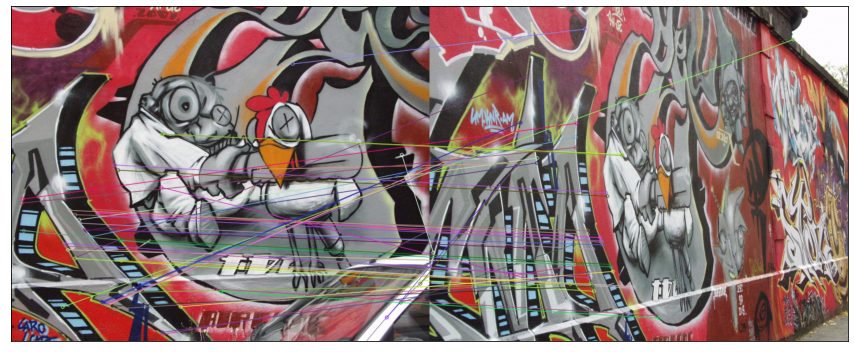

In [43]:
import cv2 as cv 
import matplotlib.pyplot as plt

im1 = cv.imread('graffiti/img1.ppm')  
im2 = cv.imread('graffiti/img5.ppm') 

assert im1 is not None
assert im2 is not None

im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = .1,edgeThreshold = 25,sigma =1)

keypoints_1, descriptors_1 = sift.detectAndCompute(im1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(im2,None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

im3 = cv.drawMatches(im1, keypoints_1, im2, keypoints_2, matches[:50], im1, flags=2)
plt.figure(figsize=(15,15))
plt.imshow(im3)
plt.xticks([]), plt.yticks([])
plt.show()

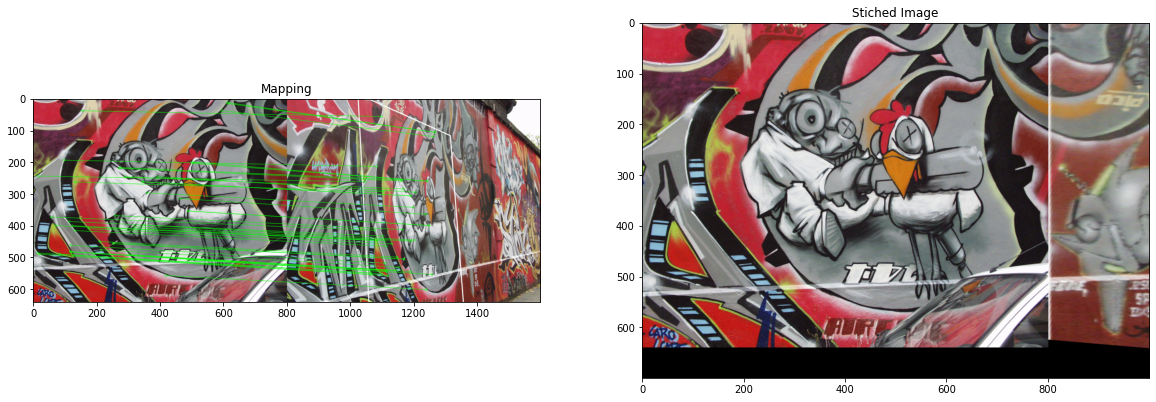

In [67]:
img1 = cv.imread('graffiti/img1.ppm')
img2 = cv.imread('graffiti/img5.ppm')

sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = .1,edgeThreshold = 25,sigma =1)

keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

goodMatches = []
for m, n in matches:
    if m.distance < 0.86 * n.distance:
        goodMatches.append(m)
MIN_MATCH_COUNT = 10
if len(goodMatches) > MIN_MATCH_COUNT:
    sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
    M, mask = cv.findHomography(sourcePoints, destinationPoints, method=cv.RANSAC, ransacReprojThreshold=5.0)
    matchesMask = mask.ravel().tolist()
    h = img1.shape[0]
    w = img1.shape[1]
    corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    transformedCorners = cv.perspectiveTransform(corners, M)
    img2 = cv.polylines(img2, [np.int32(transformedCorners)], True, (255, 255, 255), 2, cv.LINE_AA)
else:
    matchesMask = None

drawParameters = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matchesMask, flags=2)
result = cv.drawMatches(img1, keyPoints1, img2, keyPoints2, goodMatches, None, **drawParameters)

im4_warped = cv.warpPerspective(img2, np.linalg.pinv(M), (1000,700))
im4_warped[0:img1.shape[0], 0:img1.shape[1]] = img1

fig, ax = plt.subplots(1,2,figsize= (20,10))
ax[0].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
ax[0].set_title("Mapping")
ax[1].imshow(cv.cvtColor(im4_warped, cv.COLOR_BGR2RGB))
ax[1].set_title("Stiched Image")
plt.show()



In [74]:
def RansacHomo(sourcePoints,destinationPoints):
    iter = 500
    Td= 1
    maxInliers = []
    finalH = None
    for i in range(iter):
        p = np.random.randint(0,len(sourcePoints)) 
        q = np.random.randint(0,len(sourcePoints))
        r = np.random.randint(0,len(sourcePoints))
        s = np.random.randint(0,len(sourcePoints))
        
        P = [sourcePoints[p][0][0],sourcePoints[p][0][1],destinationPoints[p][0][0],destinationPoints[p][0][1]]
        Q = [sourcePoints[q][0][0],sourcePoints[q][0][1],destinationPoints[q][0][0],destinationPoints[q][0][1]]            
        x = np.vstack((P,Q))
        R = [sourcePoints[r][0][0],sourcePoints[r][0][1],destinationPoints[r][0][0],destinationPoints[r][0][1]]
        x = np.vstack((x,R))
        S = [sourcePoints[s][0][0],sourcePoints[s][0][1],destinationPoints[s][0][0],destinationPoints[s][0][1]]
        x = np.vstack((x,S))

        aList = []
        for corr in x:
            p1 = np.matrix([corr.item(0), corr.item(1), 1])
            p2 = np.matrix([corr.item(2), corr.item(3), 1])

            a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
                p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
            a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
                p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
            aList.append(a1)
            aList.append(a2)

        matrixA = np.matrix(aList)

        u, s, v = np.linalg.svd(matrixA)

        H = np.reshape(v[8], (3, 3))
        H = (1/H.item(8)) * H
        inliers = []
        for k in range(len(sourcePoints)):
            
            d = geometricDistance([sourcePoints[k][0][0],sourcePoints[k][0][1],destinationPoints[k][0][0],destinationPoints[k][0][1]], H)
            if d < Td:
                inliers.append([sourcePoints[k][0][0],sourcePoints[k][0][1],destinationPoints[k][0][0],destinationPoints[k][0][1]])

        if len(inliers) > len(maxInliers):
            maxInliers = inliers
            finalH = H


    maxInliers1 = []
    finalH1 = None
    for i in range(iter):
            p = np.random.randint(0,len(maxInliers)) 
            q = np.random.randint(0,len(maxInliers))
            r = np.random.randint(0,len(maxInliers))
            s = np.random.randint(0,len(maxInliers))
            
            P = [maxInliers[p][0],maxInliers[p][1],maxInliers[p][2],maxInliers[p][3]]
            Q = [maxInliers[q][0],maxInliers[q][1],maxInliers[q][2],maxInliers[q][3]]            
            x = np.vstack((P,Q))
            R = [maxInliers[r][0],maxInliers[r][1],maxInliers[r][2],maxInliers[r][3]]
            x = np.vstack((x,R))
            S = [maxInliers[s][0],maxInliers[s][1],maxInliers[s][2],maxInliers[s][3]]
            x = np.vstack((x,S))

            aList = []
            for corr in x:
                p1 = np.matrix([corr.item(0), corr.item(1), 1])
                p2 = np.matrix([corr.item(2), corr.item(3), 1])

                a2 = [0, 0, 0, -p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2),
                    p2.item(1) * p1.item(0), p2.item(1) * p1.item(1), p2.item(1) * p1.item(2)]
                a1 = [-p2.item(2) * p1.item(0), -p2.item(2) * p1.item(1), -p2.item(2) * p1.item(2), 0, 0, 0,
                    p2.item(0) * p1.item(0), p2.item(0) * p1.item(1), p2.item(0) * p1.item(2)]
                aList.append(a1)
                aList.append(a2)

            matrixA = np.matrix(aList)

            u, s, v = np.linalg.svd(matrixA)

            H = np.reshape(v[8], (3, 3))
            H = (1/H.item(8)) * H
            inliers = []
            for k in range(len(maxInliers)):
                
                d = geometricDistance([maxInliers[k][0],maxInliers[k][1],maxInliers[k][2],maxInliers[k][3]], H)
                if d < Td:
                    inliers.append([maxInliers[k][0],maxInliers[k][1],maxInliers[k][2],maxInliers[k][3]])
            
            if len(inliers) > len(maxInliers1):
                maxInliers1 = inliers
                finalH1 = H

    return maxInliers,finalH1

In [75]:
def homography(img1,img2):
    sift = cv.SIFT_create(nOctaveLayers = 3,contrastThreshold = .1,edgeThreshold = 25,sigma =1)

    keyPoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keyPoints2, descriptors2 = sift.detectAndCompute(img2, None)


    bf = cv.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    goodMatches = []
    for m, n in matches:
        if m.distance < 0.95 * n.distance:
            goodMatches.append(m)
    MIN_MATCH_COUNT = 10
    if len(goodMatches) > MIN_MATCH_COUNT:
        sourcePoints = np.float32([keyPoints1[m.queryIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
        destinationPoints = np.float32([keyPoints2[m.trainIdx].pt for m in goodMatches]).reshape(-1, 1, 2)
        maxInliers1,finalH1 = RansacHomo(sourcePoints,destinationPoints)

    return finalH1

In [79]:
def geometricDistance(correspondence, h):

    p1 = np.transpose(np.matrix([correspondence[0], correspondence[1], 1]))
    estimatep2 = np.dot(h, p1)
    estimatep2 = (1/estimatep2.item(2))*estimatep2

    p2 = np.transpose(np.matrix([correspondence[2], correspondence[3], 1]))
    error = p2 - estimatep2
    return np.linalg.norm(error)


img1 = cv.imread('graffiti/img1.ppm')
img2 = cv.imread('graffiti/img2.ppm')
img3 = cv.imread('graffiti/img3.ppm')
img4 = cv.imread('graffiti/img4.ppm')
img5 = cv.imread('graffiti/img5.ppm')


H12 = homography(img1,img2)
H23 = homography(img2,img3)
H34 = homography(img3,img4)
H45 = homography(img4,img5)

H15 = H45 @ H34 @ H23 @ H12
print(H15)

[[ 6.11394119e-01  6.02111580e-02  2.22908407e+02]
 [ 2.10232135e-01  1.16066602e+00 -2.35354777e+01]
 [ 4.64286327e-04 -3.27588603e-05  9.99559243e-01]]


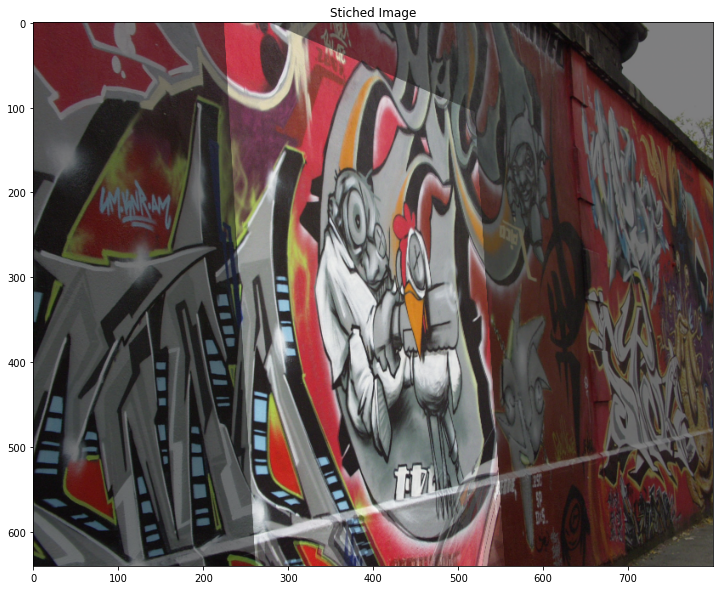

In [80]:
im5_warped = cv.warpPerspective(img1, H15, (img5.shape[1],img5.shape[0]))
out = cv.addWeighted(img5,0.5,im5_warped,0.5,0)

fig, ax = plt.subplots(figsize= (20,10))
ax.imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax.set_title("Stiched Image")
plt.show()